# Business Case:- 
- FicZon Inc is an IT solution provider with products ranging from on-premises products to SAAS based solutions. FicZon major leads generation channel is digital and through their website.
- FicZon business is majorly dependent on the sales force effectiveness. As the market is maturing and more new competitors entering the market, FicZon is experiencing the dip in sales. 
- Effective sales is dependent on lead quality and as of now, this is based on manual categorization and highly depended on sales staff. Though there is a quality process, which continuously updates the lead categorization, it’s value is in for post analysis, rather than conversation.
- FicZon wants to explore Machine Learning to pre-categorize the lead quality and as result, expecting significant increase in sales effectiveness.

# Understanding the Problem Statement in this Business Case
**The company motive is to invest in the right prospects and to find out the Lead Quality, thereby deciding whether the lead should be followed or not.**

In [61]:
#install mysql and mysql-connector
! pip install mysql
! pip install mysql-connector-python

In [62]:
#importing required libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import mysql.connector
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

## Collecting Database from server:-

In [63]:
## making connections to database server
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!')

In [64]:
### Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [65]:
#### connecting to the required database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [66]:
connection

In [67]:
#fetching data
sql=pd.read_sql_query("select * from data", connection, parse_dates=True)

## Saving database from server to pc -

In [68]:
#Converting sql into csv
sql.to_csv('sales.csv')

In [69]:
# Creating dataframe
data=pd.read_csv('sales.csv')

In [70]:
#reading records
data

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...,...
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


# Domain Analysis

* **Created**- This feature shows the date and time of the when the data was created
* **Product_ID**- ID of the products  
* **Source**- Represents the source from where the customers are engaging
* **Mobile**- Represents Mobile number of the sales agents
* **EMAIL**- Represents Email of the sales agents
* **Sales_Agent**- Represents sales agents levels
* **Location**- Represents the location where it is situated
* **Delivery_Mode**- Represents the mode through which delivery is done
* **Status**- Represents the status of conversion

# Basic Checks

In [71]:
#checking first five rows
data.head()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open


In [72]:
#checking last 5 rows
data.tail()

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,7421,28-04-2018 07:54,25.0,Website,NaN,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [73]:
#checking info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7422 non-null   int64  
 1   Created        7422 non-null   object 
 2   Product_ID     7364 non-null   float64
 3   Source         7405 non-null   object 
 4   Mobile         5612 non-null   object 
 5   EMAIL          7422 non-null   object 
 6   Sales_Agent    7399 non-null   object 
 7   Location       7364 non-null   object 
 8   Delivery_Mode  7422 non-null   object 
 9   Status         7422 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 580.0+ KB


In [74]:
#checking data-types
data.dtypes

Unnamed: 0         int64
Created           object
Product_ID       float64
Source            object
Mobile            object
EMAIL             object
Sales_Agent       object
Location          object
Delivery_Mode     object
Status            object
dtype: object

In [75]:
#checking statistics of variables
data.describe()

,Unnamed: 0,Product_ID
count,7422.000000,7364.000000
mean,3710.500000,15.947311
std,2142.691182,6.072937
min,0.000000,0.000000
25%,1855.250000,12.000000
50%,3710.500000,18.000000
75%,5565.750000,19.000000
max,7421.000000,28.000000


In [76]:
#checking statistics of categorical variables
data.describe(include='O')

,Created,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7405,5612,7422,7399,7364,7422,7422
unique,6752,25,486,883,12,17,5,11
top,26-09-2018 11:30,Call,XXXXXXX,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,2547,222,1701,1500,2500,2975,1536


In [77]:
#checking max rows
data.head(pd.reset_option('display.max_rows',None))

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,0,14-11-2018 10:05,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,Open
1,1,14-11-2018 09:22,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,Open
2,2,14-11-2018 09:21,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,Open
3,3,14-11-2018 08:46,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
4,4,14-11-2018 07:34,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,Open
...,...,...,...,...,...,...,...,...,...,...
7417,7417,28-04-2018 09:45,9.0,Call,NaN,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,7418,28-04-2018 09:43,15.0,Call,NaN,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,7419,28-04-2018 09:20,5.0,Live Chat-Direct,NaN,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,7420,28-04-2018 08:04,21.0,CRM form,NaN,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [78]:
#checking shape of the data
data.shape

(7422, 10)

In [79]:
#Checking Duplicates
print(data.loc[data.duplicated()].shape)

(0, 10)


# Data Visualization (EDA) 

**Univariant Analysis:-**
- Univariate analysis is basically the simplest form to analyze data. Uni means one and this means that the data has only one kind of variable.


**COUNT PLOT**
- The countplot is used to represent the occurrence(counts) of the observation present in the categorical variable. It uses the concept of a bar chart

<AxesSubplot:>

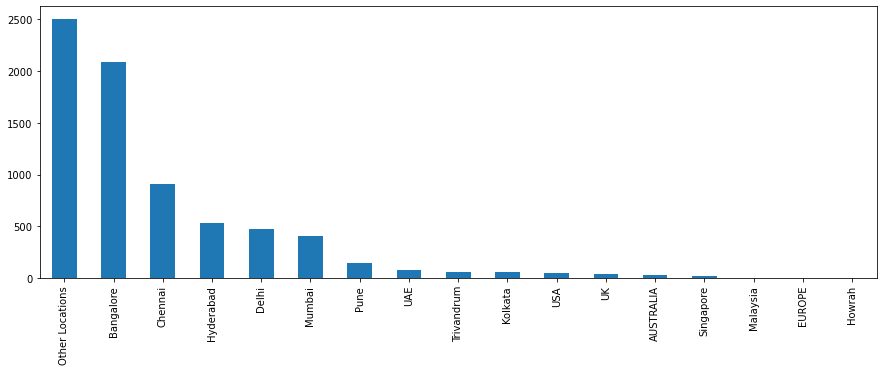

In [80]:
plt.figure(figsize=(15,5))
data.Location.value_counts().plot(kind='bar')

**observations-**
- The value counts for Other locations is maximum followed by Bangalore alone.
- The value counts for Australia, Singapore,Malaysia,Europe,Howrah are minimum.

<AxesSubplot:>

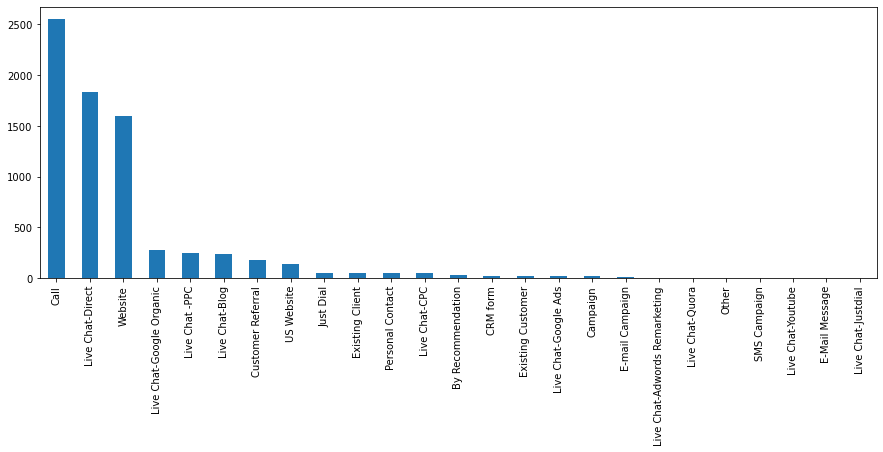

In [81]:
plt.figure(figsize=(15,5))
data.Source.value_counts().plot(kind='bar')

**observations-**
- The value counts for call is maximum followed by live chat-Direct and website.


<AxesSubplot:>

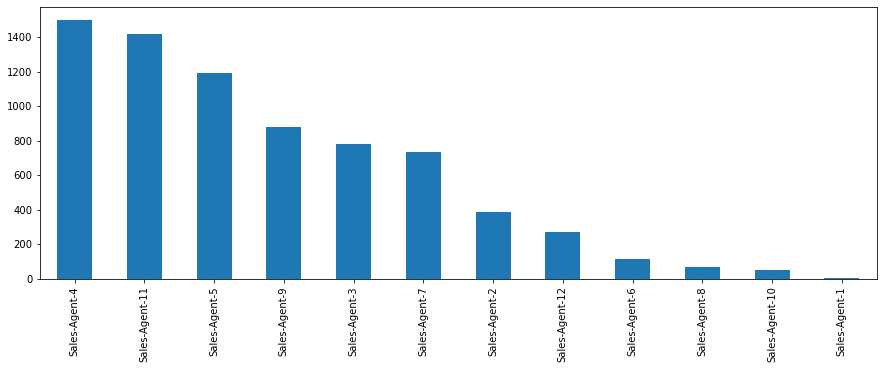

In [82]:
plt.figure(figsize=(15,5))
data.Sales_Agent.value_counts().plot(kind='bar')

**observations-**
- The value counts for sales-agent 4 is maximum.
- The value counts for sales-agent 1 is minimum.

<AxesSubplot:>

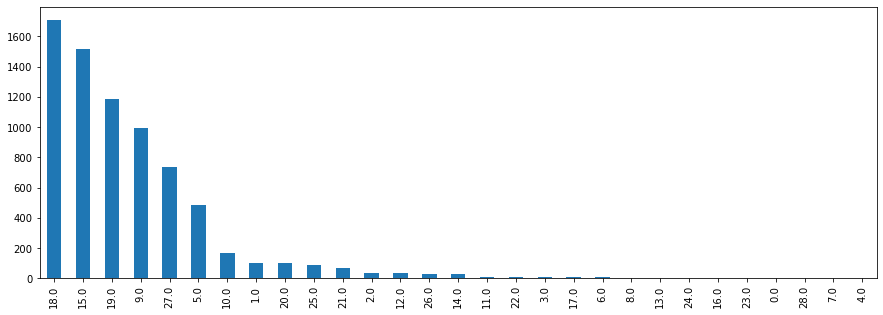

In [83]:
plt.figure(figsize=(15,5))
data.Product_ID.value_counts().plot(kind='bar')

**observations-**
- The maximum count is 18 and minimum counts is 11

<AxesSubplot:>

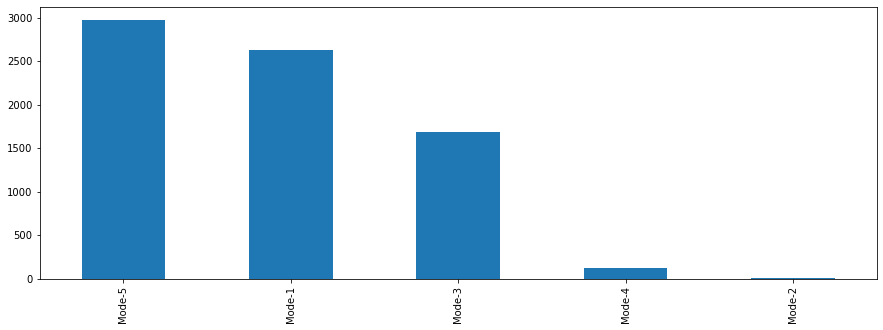

In [84]:
plt.figure(figsize=(15,5))
data.Delivery_Mode.value_counts().plot(kind='bar')

**Observations-**
- The Mode-5 has maximum counts.
- The Mode-2 has minimum counts

## Compressing and Merging the labels in column for better visualisation

In [85]:
# Assigning multiples labels into single label.
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Customer','CRM form','Personal Contact'],'Existing Client',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [86]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Overseas',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [87]:
# Defining 'Status' as 'High Potential' or 'Low Potential'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'High Potential',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'Low Potential',inplace=True)

In [88]:
#Creating Day,Month,Weekday etc for better exploration of data
data['Created']=pd.to_datetime(data.Created)

In [89]:
data['Day']=data.Created.dt.day
data['Month']=data.Created.dt.month
data['Weekday']=data.Created.dt.weekday
data['Year']=data.Created.dt.year          
data['Hour']=data.Created.dt.hour
data['Minute']=data.Created.dt.minute

In [90]:
data.head(5)

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,High Potential,14,11,2,2018,10,5
1,1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,9,22
2,2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,9,21
3,3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,8,46
4,4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,7,34


**LINEPLOT**
- Line graphs (or line charts) are best when you want to show how the value of something changes over time, or compare how several things changes.

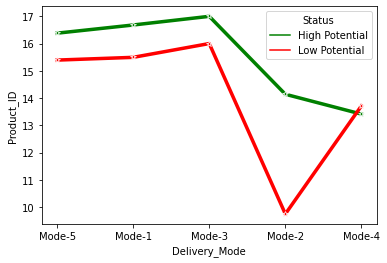

In [91]:
sns.lineplot(x='Delivery_Mode', y='Product_ID', data=data,hue='Status', ci=None,marker="*",palette=['g', 'r'],linewidth=3.5)  # hue is for categorical data
plt.show()

**Observations-**
- The product_ID 17 and Model-3 has higher potential.
- The product_ID 16 and Model-3 has lower potential.
- The product_ID 14 and Model-2 has higher potential.
- The product_ID 10 and Model-2 has lower potential.

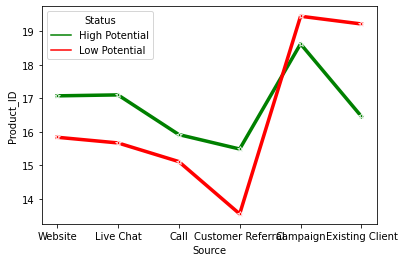

In [92]:
sns.lineplot(x='Source', y='Product_ID', data=data,hue='Status', ci=None,marker="*",palette=['g', 'r'],linewidth=3.5)  # hue is for categorical data
plt.show()

**Observations-**
- The product_ID 18 and source Campaign has higher potential.
- The product_ID 19 and source Campaign has lower potential.
- The product_ID 14 and source Customer Referral has lower potential.
- The product_ID 16 and source Customer Referral has higher potential.

**PIE CHART**
- A pie chart is a pictorial representation of data in the form of a circular chart or pie where the slices of the pie show the size of the data.

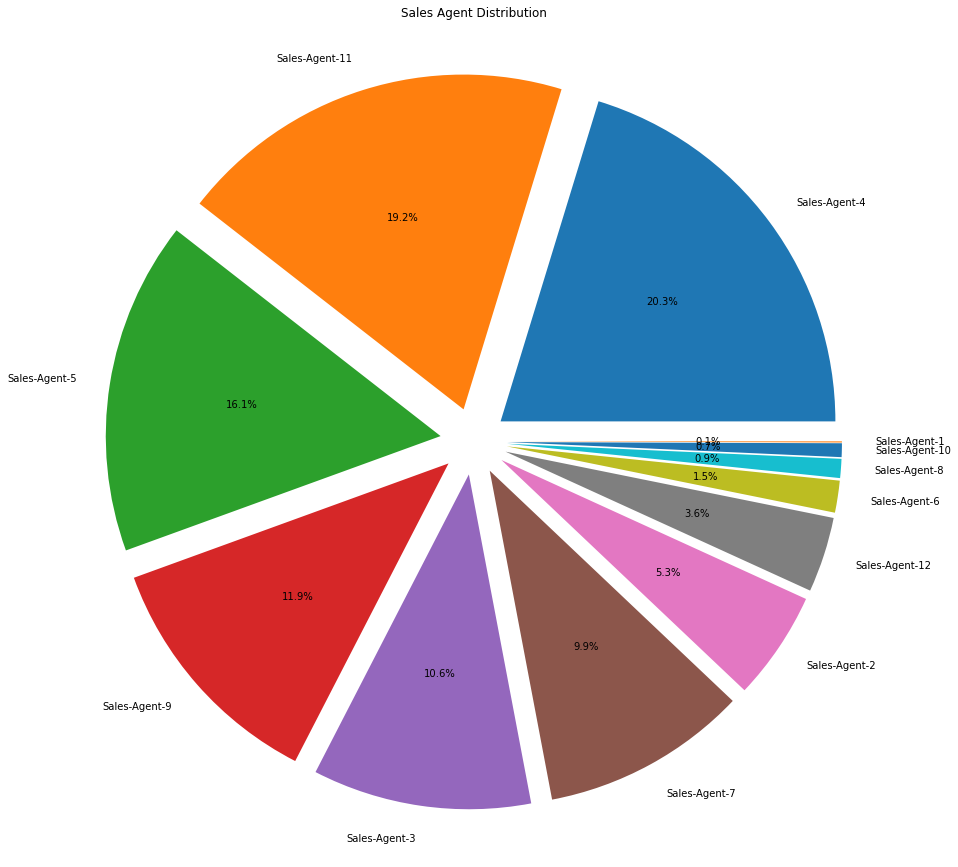

In [93]:
# Set the figure size
plt.figure(figsize=(20,15))
sales_agent_counts = data['Sales_Agent'].value_counts()
plt.pie(sales_agent_counts, labels=sales_agent_counts.index, autopct='%1.1f%%', explode=[0.1]*len(sales_agent_counts))
# Set the title of the pie chart
plt.title('Sales Agent Distribution')
# Display the pie chart
plt.show()

**BAR PLOT**
- A bar chart is used to show a distribution of data points or perform a comparison of metric values across different subgroups of data.

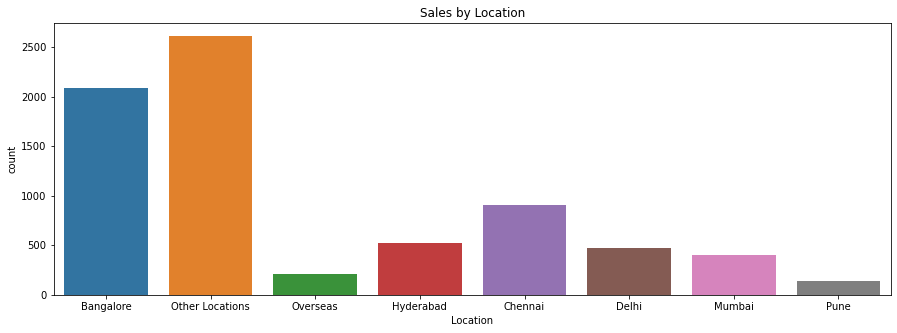

In [94]:
plt.figure(figsize=(15, 5))
sns.countplot(data=data, x='Location')
plt.title('Sales by Location')
plt.show()

**Observations-**
- Other locations has maximum counts followed by Bangalore .
- Pune has minimum counts.

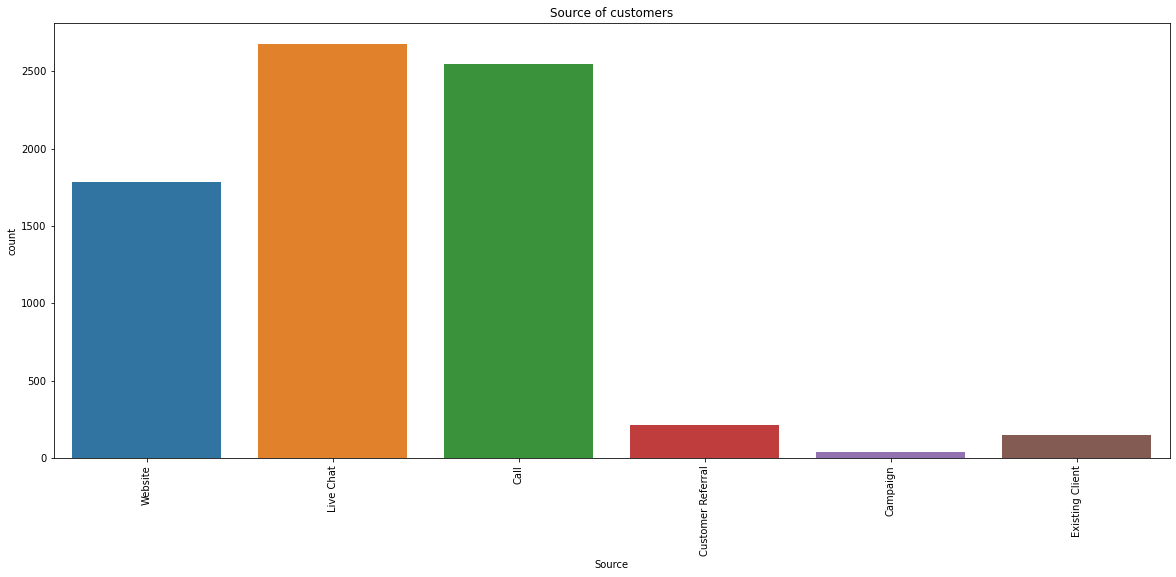

In [95]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Source')
plt.title('Source of customers')
plt.xticks(rotation=90)
plt.show()

**Observations-**
- After merging the labels, Live chat has the maximum counts followed by call and website.
- Campaign has the minimum count.

<AxesSubplot:xlabel='Location', ylabel='count'>

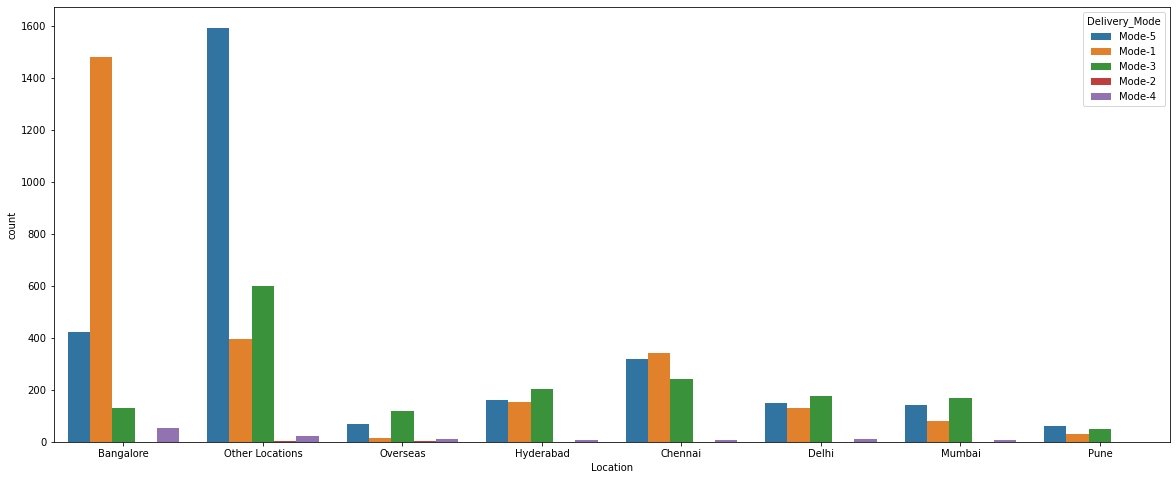

In [96]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Location', hue='Delivery_Mode', data=data)

**Observations-**
- In Bangalore, the delivery mode for mode-1 is the maximum followed by mode-5.
- In other locations, the delivery mode for mode-5 is the maximum followed by mode-3.
- In Overseas,Hyderabad,Chennai,Delhi,Mumbai the delivery model for mode-4 is the least.


<AxesSubplot:xlabel='Location', ylabel='count'>

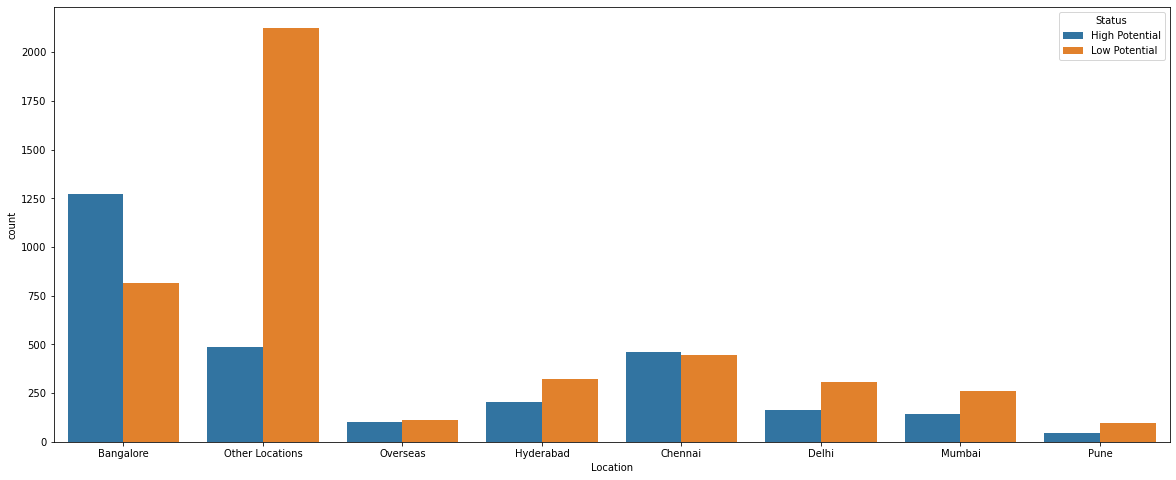

In [97]:
plt.figure(figsize=(20, 8))
sns.countplot(x='Location', hue='Status', data=data)

**Observations-**
- In Bangalore, the counts for the high potential leads are maximum.
- In other location, the counts for the low potential leads are minimum.
- In overseas, the counts for the high potential leads and low potential leads are almost the same
- In Chennai,the counts for the high potential leads and low potential leads are almost the same.
- In Delhi,Mumbai,Pune the counts for low potential leads are maximum

# Data Preprocessing

In [98]:
data.head(5)

,Unnamed: 0,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Year,Hour,Minute
0,0,2018-11-14 10:05:00,NaN,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,NaN,Mode-5,High Potential,14,11,2,2018,10,5
1,1,2018-11-14 09:22:00,NaN,Website,XXXXXXX,#VALUE!,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,9,22
2,2,2018-11-14 09:21:00,NaN,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,9,21
3,3,2018-11-14 08:46:00,NaN,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,8,46
4,4,2018-11-14 07:34:00,NaN,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,NaN,Mode-5,High Potential,14,11,2,2018,7,34


In [99]:
#Checking missing Values
data.isnull().sum()

Unnamed: 0          0
Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
Day                 0
Month               0
Weekday             0
Year                0
Hour                0
Minute              0
dtype: int64

# Handling Numerical features

<AxesSubplot:xlabel='Product_ID', ylabel='Density'>

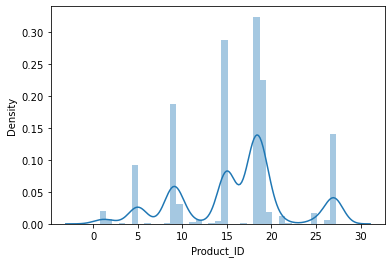

In [100]:
sns.distplot(data['Product_ID'])

In [101]:
data.Product_ID.value_counts()

18.0    1711
15.0    1518
19.0    1189
9.0      992
27.0     739
5.0      487
10.0     168
1.0      105
20.0     102
25.0      90
21.0      66
2.0       38
12.0      36
26.0      31
14.0      27
11.0      12
22.0       8
3.0        7
17.0       7
6.0        7
8.0        6
13.0       5
24.0       3
16.0       3
23.0       2
0.0        2
28.0       1
7.0        1
4.0        1
Name: Product_ID, dtype: int64

In [102]:
#Replacing NAN values with mode 
data['Product_ID'] = data['Product_ID'].replace(np.nan,'18.0')

In [103]:
# Checking missing values after imputation
data['Product_ID'].isnull().sum()

0

# Handling Categorical features

In [104]:
data.Source.value_counts()

Live Chat            2677
Call                 2547
Website              1787
Customer Referral     212
Existing Client       146
Campaign               36
Name: Source, dtype: int64

In [105]:
#Replacing NAN values with mode
data['Source'] = data['Source'].replace(np.nan,'Live Chat')

In [106]:
# Checking missing values after imputation
data['Source'].isnull().sum()

0

In [107]:
data.Sales_Agent.value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [108]:
#Replacing NAN values with mode
data['Sales_Agent'] = data['Sales_Agent'].replace(np.nan,'Sales-Agent-4')

In [109]:
# Checking missing values after imputation
data['Sales_Agent'].isnull().sum()

0

In [110]:
data.Location.value_counts()

Other Locations    2614
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Overseas            214
Pune                142
Name: Location, dtype: int64

In [111]:
#Replacing NAN values with mode
data['Location'] = data['Location'].replace(np.nan,'Other Locations')

In [112]:
# Checking missing values after imputation
data['Location'].isnull().sum()

0

In [113]:
#dropping unique features
data.drop(['Mobile','EMAIL','Unnamed: 0','Created','Year'],axis=1,inplace=True)

In [114]:
# dropping all duplicate values
data = data.drop_duplicates(keep=False)
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,18.0,Website,Sales-Agent-11,Other Locations,Mode-5,High Potential,14,11,2,10,5
1,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential,14,11,2,9,22
2,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential,14,11,2,9,21
3,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential,14,11,2,8,46
4,18.0,Website,Sales-Agent-10,Other Locations,Mode-5,High Potential,14,11,2,7,34
...,...,...,...,...,...,...,...,...,...,...,...
7417,9.0,Call,Sales-Agent-6,Mumbai,Mode-4,Low Potential,28,4,5,9,45
7418,15.0,Call,Sales-Agent-12,Other Locations,Mode-5,Low Potential,28,4,5,9,43
7419,5.0,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Low Potential,28,4,5,9,20
7420,21.0,Existing Client,Sales-Agent-4,Other Locations,Mode-1,Low Potential,28,4,5,8,4


# Categorical Encoding

In [115]:
## Using label encoder to convert the categorical data to numerical data

from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Source=lc.fit_transform(data.Source)
data.Sales_Agent=lc.fit_transform(data.Sales_Agent)
data.Location=lc.fit_transform(data.Location)
data.Delivery_Mode=lc.fit_transform(data.Delivery_Mode)
data.Status=lc.fit_transform(data.Status)

In [116]:
data.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,18.0,5,2,5,4,0,14,11,2,10,5
1,18.0,5,1,5,4,0,14,11,2,9,22


# Feature scaling using MinMaxScaler:-

In [117]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['Source', 'Product_ID', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status', 'Day', 'Month', 'Weekday', 'Hour', 'Minute']]=scale.fit_transform(data[['Source', 'Product_ID', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status', 'Day','Month', 'Weekday', 'Hour', 'Minute']])

In [118]:
data.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
0,0.642857,1.0,0.181818,0.714286,1.0,0.0,0.346154,0.909091,0.333333,0.434783,0.084746
1,0.642857,1.0,0.090909,0.714286,1.0,0.0,0.346154,0.909091,0.333333,0.391304,0.372881


In [119]:
data.tail(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Day,Month,Weekday,Hour,Minute
7420,0.750000,0.6,0.545455,0.714286,0.0,1.0,0.884615,0.272727,0.833333,0.347826,0.067797
7421,0.892857,1.0,0.454545,0.142857,0.0,0.0,0.884615,0.272727,0.833333,0.304348,0.915254


In [120]:
#resetting Index
data=data.reindex(columns=['Product_ID','Source','Sales_Agent','Location','Delivery_Mode','Day','Month','Weekday','Hour','Minute','Status'])

In [121]:
data.head(2)

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Day,Month,Weekday,Hour,Minute,Status
0,0.642857,1.0,0.181818,0.714286,1.0,0.346154,0.909091,0.333333,0.434783,0.084746,0.0
1,0.642857,1.0,0.090909,0.714286,1.0,0.346154,0.909091,0.333333,0.391304,0.372881,0.0


# Splitting the dataset

In [122]:
#drfining X and y 
X=data.iloc[0:,:-1]   # except the last feature all are take
y=data.Status

In [123]:
#Finding out the best feature which will contribute and have good relation with target variable.
from sklearn.ensemble import ExtraTreesClassifier
selection = ExtraTreesClassifier()
selection.fit(X, y)

ExtraTreesClassifier()

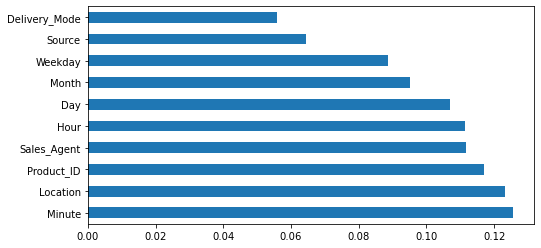

In [124]:
#plot graph of important features for better visualization
plt.figure(figsize = (8,4))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Observations-**
- The important features can be visualized.
- It is observed that almost all the features are important.

# Model Creation

In [125]:
X

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Day,Month,Weekday,Hour,Minute
0,0.642857,1.0,0.181818,0.714286,1.00,0.346154,0.909091,0.333333,0.434783,0.084746
1,0.642857,1.0,0.090909,0.714286,1.00,0.346154,0.909091,0.333333,0.391304,0.372881
2,0.642857,1.0,0.090909,0.714286,1.00,0.346154,0.909091,0.333333,0.391304,0.355932
3,0.642857,1.0,0.090909,0.714286,1.00,0.346154,0.909091,0.333333,0.347826,0.779661
4,0.642857,1.0,0.090909,0.714286,1.00,0.346154,0.909091,0.333333,0.304348,0.576271
...,...,...,...,...,...,...,...,...,...,...
7417,0.321429,0.0,0.727273,0.571429,0.75,0.884615,0.272727,0.833333,0.391304,0.762712
7418,0.535714,0.0,0.272727,0.714286,1.00,0.884615,0.272727,0.833333,0.391304,0.728814
7419,0.178571,0.8,0.181818,0.000000,0.00,0.884615,0.272727,0.833333,0.391304,0.338983
7420,0.750000,0.6,0.545455,0.714286,0.00,0.884615,0.272727,0.833333,0.347826,0.067797


In [126]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
7417    1.0
7418    1.0
7419    1.0
7420    1.0
7421    0.0
Name: Status, Length: 7366, dtype: float64

## Splitting the dataset into train_test_split:-

In [127]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=42,test_size=0.25)

## Balancing the dataset

<AxesSubplot:title={'center':'Class distribution before appying SMOTE'}, xlabel='Outcome'>

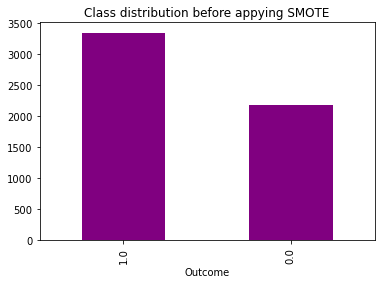

In [128]:
#Checking distribution before applying smote
pd.Series(y_train).value_counts().plot(kind='bar',color='purple',title='Class distribution before appying SMOTE', xlabel='Outcome')


In [129]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [130]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [131]:
X_smote, y_smote = smote.fit_resample(X_train,y_train)

<AxesSubplot:title={'center':'Class distribution after appying SMOTE'}, xlabel='Outcome'>

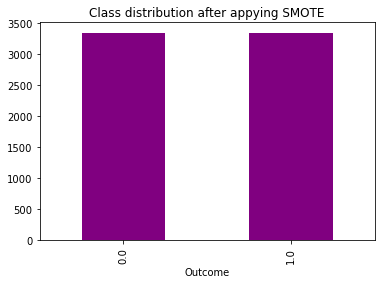

In [132]:
pd.Series(y_smote).value_counts().plot(kind='bar',color='purple',title='Class distribution after appying SMOTE', xlabel='Outcome')


# Model Creation

## Logistic Regression

In [133]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [134]:
clf.fit(X_smote,y_smote) 

LogisticRegression()

In [135]:
y_pred = clf.predict(X_test) #test
y_pred_train = clf.predict(X_smote) #training

In [136]:
print(f1_score(y_test,y_pred)) #testing
print(f1_score(y_smote,y_pred_train)) #training

0.688953488372093
0.6578092707410688


In [137]:
print(accuracy_score(y_test,y_pred)) #testing
print(accuracy_score(y_smote,y_pred_train)) #training

0.6514657980456026
0.6533054142985343


In [138]:
print(precision_score(y_test,y_pred)) #testing
print(precision_score(y_smote,y_pred_train)) #training

0.7360248447204969
0.6493733605362868


In [139]:
print(recall_score(y_test,y_pred)) #testing
print(recall_score(y_smote,y_pred_train)) #training

0.6475409836065574
0.6664672449895304


In [140]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [141]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["Logistic Regression", "0.69",'0.65','0.73','0.64'])


In [142]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["Logistic Regression", "0.65",'0.65','0.65','0.66'])

In [143]:
print(x)
print(y)

+---------------------+----------+----------+-----------+--------+
|     Model(Test)     | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   0.69   |   0.65   |    0.73   |  0.64  |
+---------------------+----------+----------+-----------+--------+
+---------------------+----------+----------+-----------+--------+
|     Model(Train)    | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| Logistic Regression |   0.65   |   0.65   |    0.65   |  0.66  |
+---------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.69 and for train data is 0.65.
- The accuracy score for test data is 0.65 and for train data is 0.65.
- The precision score  for test data is 0.73 and for train data is 0.65.
- The recall score for test data is 0.64 and for train data is 0.66
- The model has low bias and low variance so it can be considered as a generalised model.

# Support Vector Machine - Classifier

In [144]:
from sklearn.svm import SVC
svclassifier = SVC()

In [145]:
svclassifier.fit(X_smote, y_smote) # Training the model

SVC()

In [146]:
X_pred1 = svclassifier.predict(X_test) #Prediction for test data
X_pred_train1= svclassifier.predict(X_smote) #prediction for training data

In [147]:
print(f1_score(y_test,X_pred1))
print(f1_score(y_smote,X_pred_train1))

0.6717325227963525
0.7012195121951219


In [148]:
print(accuracy_score(y_test,X_pred1))
print(accuracy_score(y_smote,X_pred_train1))

0.6482084690553745
0.7215076278791505


In [149]:
print(precision_score(y_test,X_pred1))
print(precision_score(y_smote,X_pred_train1))

0.7568493150684932
0.7563170647282796


In [150]:
print(recall_score(y_test,X_pred1))
print(recall_score(y_smote,X_pred_train1))

0.6038251366120219
0.6536045468142387


In [242]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [243]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Support Vector Machine", "0.67",'0.64','0.75','0.60'])

In [244]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Support Vector Machine", "0.70",'0.72','0.75','0.65'])

In [245]:
print(x)
print(y)

+--------------------------+----------+----------+-----------+--------+
|       Model(Test)        | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.67   |   0.64   |    0.75   |  0.60  |
+--------------------------+----------+----------+-----------+--------+
+--------------------------+----------+----------+-----------+--------+
|       Model(Train)       | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.70   |   0.72   |    0.75   |  0.65  |
+--------------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.67 and for train data is 0.70.
- The accuracy score for test data is 0.64 and for train data is 0.72.
- The precision score  for test data is 0.75 and for train data is 0.75.
- The recall score for test data is 0.60 and for train data is 0.65
- The model has low bias and low variance so it can be considered as a generalised model.

**Hyperparameter tuning is done for better performance.**

# Hyperparameter tuning- Support Vector Machine( Classifier)

In [151]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svclassifier,X_smote,y_smote,cv=3,scoring='f1') ## instead of svclassifier we can also give models like linear regression an dlogistic regression
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())


[0.65779468 0.66068053 0.678606  ]
Cross validation Score: 0.6656937360142531
Std : 0.00920604854004545


In [152]:
from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 

grid = GridSearchCV(SVC(random_state=42), param_grid, verbose =3,scoring='f1',cv=5)
  
# fitting the model for grid search
grid.fit(X_smote, y_smote)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.668 total time=   1.5s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.641 total time=   1.5s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.648 total time=   1.4s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.673 total time=   1.5s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.651 total time=   1.5s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.672 total time=   1.5s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.652 total time=   1.5s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.644 total time=   1.5s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.654 total time=   1.5s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.641 total time=   1.5s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.646 total time=   1.8s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=3)

In [153]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1000, 'gamma': 1}
SVC(C=1000, gamma=1, random_state=42)


In [154]:
clf2=SVC(C=1000, gamma=1, random_state=42)

In [155]:
clf2.fit(X_smote, y_smote)

SVC(C=1000, gamma=1, random_state=42)

In [156]:
X_pred12 = clf2.predict(X_test)#testing
X_pred_train12 =clf2.predict(X_smote)

In [157]:
print(f1_score(y_test,X_pred12))
print(f1_score(y_smote,X_pred_train12))

0.6768236380424745
0.9653927174240144


In [158]:
print(accuracy_score(y_test,X_pred12))
print(accuracy_score(y_smote,X_pred_train12))

0.6199782844733985
0.9655997606939875


In [159]:
print(precision_score(y_test,X_pred12))
print(precision_score(y_smote,X_pred_train12))

0.6863295880149812
0.971238268240993


In [160]:
print(recall_score(y_test,X_pred12))
print(recall_score(y_smote,X_pred_train12))

0.6675774134790529
0.9596171103798983


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [246]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Support Vector Machine", "0.67",'0.61','0.68','0.66'])

In [247]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Support Vector Machine", "0.96",'0.96','0.97','0.95'])

In [248]:
print(x)
print(y)

+--------------------------+----------+----------+-----------+--------+
|       Model(Test)        | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.67   |   0.64   |    0.75   |  0.60  |
| # Support Vector Machine |   0.67   |   0.61   |    0.68   |  0.66  |
+--------------------------+----------+----------+-----------+--------+
+--------------------------+----------+----------+-----------+--------+
|       Model(Train)       | f1_score | accuracy | precision | recall |
+--------------------------+----------+----------+-----------+--------+
| # Support Vector Machine |   0.70   |   0.72   |    0.75   |  0.65  |
| # Support Vector Machine |   0.96   |   0.96   |    0.97   |  0.95  |
+--------------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.67 and for train data is 0.70.
- The accuracy score for test data is 0.61 and for train data is 0.96.
- The precision score  for test data is 0.68 and for train data is 0.97.
- The recall score for test data is 0.66 and for train data is 0.95.
- The model has high bias and low variance so it can't be considered as a generalised model.

- In this algorithm, we can see that the scores have significantly dropped after using hyperparameter tuning so we will not consider tuning scores.

# K- Nearest Neighbour

In [161]:
from sklearn.neighbors import KNeighborsClassifier

In [162]:
error_rate = []
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_smote,y_smote)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test)) 

Text(0, 0.5, 'Error Rate')

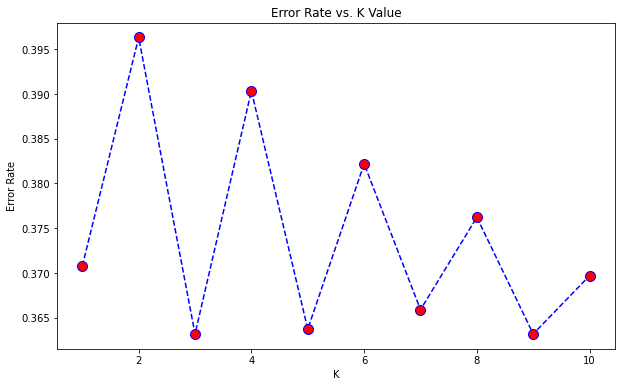

In [163]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [164]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_smote, y_smote) # Training the model

KNeighborsClassifier(n_neighbors=9)

In [165]:
X_pred = knn.predict(X_test) #testing
X_pred_train = knn.predict(X_smote) #training

In [166]:
print(f1_score(y_test,X_pred))
print(f1_score(y_smote,X_pred_train))

0.6738176499268649
0.7461696414468489


In [167]:
print(accuracy_score(y_test,X_pred))
print(accuracy_score(y_smote,X_pred_train))

0.6368078175895765
0.7596470236314687


In [168]:
print(recall_score(y_test,X_pred))
print(recall_score(y_smote,X_pred_train))

0.6293260473588342
0.7065510020939276


In [169]:
print(precision_score(y_test,X_pred))
print(precision_score(y_smote,X_pred_train))

0.7250786988457503
0.7904953145917001


In [256]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [257]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# K Nearest Neighbor", "0.67",'0.63','0.72','0.62'])

In [258]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# K Nearest Neighbor", "0.74",'0.75','0.79','0.70'])

In [259]:
print(x)
print(y)

+----------------------+----------+----------+-----------+--------+
|     Model(Test)      | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
| # K Nearest Neighbor |   0.67   |   0.63   |    0.72   |  0.62  |
+----------------------+----------+----------+-----------+--------+
+----------------------+----------+----------+-----------+--------+
|     Model(Train)     | f1_score | accuracy | precision | recall |
+----------------------+----------+----------+-----------+--------+
| # K Nearest Neighbor |   0.74   |   0.75   |    0.79   |  0.70  |
+----------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.67 and for train data is 0.74.
- The accuracy score for test data is 0.63 and for train data is 0.75.
- The precision score  for test data is 0.72 and for train data is 0.79.
- The recall score for test data is 0.62 and for train data is 0.70.
- The model has high bias and low variance so it can't be considered as a generalised model.

## Bagging( KNN)

In [170]:
from sklearn.ensemble import BaggingClassifier

model_bagg=BaggingClassifier(base_estimator=knn,n_estimators=10,n_jobs=-1,random_state=42)#n_estimator is number of times model repeated 

model_bagg.fit(X_train,y_train)

y_hat_bagg=model_bagg.predict(X_test)
y_hat_bagg_train=model_bagg.predict(X_train)

In [171]:
print((f1_score(y_test,y_hat_bagg)))
print((f1_score(y_train,y_hat_bagg_train)))

0.7264920566766853
0.7958663646659117


In [172]:
print(accuracy_score(y_test,y_hat_bagg))
print(accuracy_score(y_train,y_hat_bagg_train))

0.6541802388707926
0.7389572773352643


In [173]:
print(recall_score(y_test,y_hat_bagg))
print(recall_score(y_train,y_hat_bagg_train))

0.7704918032786885
0.8408615016452289


In [174]:
print(precision_score(y_test,y_hat_bagg))
print(precision_score(y_train,y_hat_bagg_train))

0.6872461413484972
0.7554420854608976


In [260]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [261]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Bagging", "0.72",'0.65','0.68','0.77'])

In [262]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Bagging", "0.79",'0.73','0.75','0.84'])

In [263]:
print(x)
print(y)

+-------------+----------+----------+-----------+--------+
| Model(Test) | f1_score | accuracy | precision | recall |
+-------------+----------+----------+-----------+--------+
|  # Bagging  |   0.72   |   0.65   |    0.68   |  0.77  |
+-------------+----------+----------+-----------+--------+
+--------------+----------+----------+-----------+--------+
| Model(Train) | f1_score | accuracy | precision | recall |
+--------------+----------+----------+-----------+--------+
|  # Bagging   |   0.79   |   0.73   |    0.75   |  0.84  |
+--------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.72 and for train data is 0.79.
- The accuracy score for test data is 0.65 and for train data is 0.73.
- The precision score  for test data is 0.68 and for train data is 0.75.
- The recall score for test data is 0.77 and for train data is 0.84
- The model has low bias and low variance so it can be considered as a generalised model.
- After performing bagging, the scores were improved.

# Decision Tree:-

In [175]:
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier(random_state=42)

In [176]:
dtr.fit(X_smote,y_smote)

DecisionTreeClassifier(random_state=42)

In [177]:
X_pred13 = dtr.predict(X_test)
X_pred_train13 = dtr.predict(X_smote)

In [178]:
print(f1_score(y_test,X_pred13))
print(f1_score(y_smote,X_pred_train13))

0.6923076923076923
0.999850411368736


In [179]:
print(accuracy_score(y_test,X_pred13))
print(accuracy_score(y_smote,X_pred_train13))

0.6308360477741585
0.9998504337421478


In [180]:
print(precision_score(y_test,X_pred13))
print(precision_score(y_smote,X_pred_train13))

0.6879496402877698
1.0


In [181]:
print(recall_score(y_test,X_pred13))
print(recall_score(y_smote,X_pred_train13))

0.6967213114754098
0.9997008674842955


In [264]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [265]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Decision Tree", "0.69",'0.63','0.68','0.69'])

In [266]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Decision Tree", "0.99",'0.99','1.0','0.99'])

In [267]:
print(x)
print(y)

+-----------------+----------+----------+-----------+--------+
|   Model(Test)   | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.69   |   0.63   |    0.68   |  0.69  |
+-----------------+----------+----------+-----------+--------+
+-----------------+----------+----------+-----------+--------+
|   Model(Train)  | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.99   |   0.99   |    1.0    |  0.99  |
+-----------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.69 and for train data is 0.99.
- The accuracy score for test data is 0.63 and for train data is 0.99.
- The precision score  for test data is 0.68 and for train data is 1.0.
- The recall score for test data is 0.69 and for train data is 0.99.
- The model has high bias and low variance so it can't be considered as a generalised model.
- Since,the model has high bias and low variance so hyperparameter tuning is performed.

# Hyperparameter tuning:-

In [182]:
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 20))), #depth of tree range from 1 to 19
    "min_samples_split":(list(range(2, 20))),    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 20)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19 
}


In [183]:
tree_clf = DecisionTreeClassifier(random_state=1000)#object creation for decision tree with random state 3

In [184]:
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=1, cv=3)

In [185]:
tree_cv.fit(X_smote,y_smote)#training data on gridsearch cv

Fitting 3 folds for each of 25992 candidates, totalling 77976 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1000),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19],
                         'splitter': ('best', 'random')},
             scoring='f1', verbose=1)

In [186]:
best_params = tree_cv.best_params_#it will give you best parameters 
print(f"Best paramters: {best_params})")#printing  best parameters

Best paramters: {'criterion': 'entropy', 'max_depth': 17, 'min_samples_leaf': 13, 'min_samples_split': 2, 'splitter': 'best'})


In [228]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=17,min_samples_leaf=13,min_samples_split=2,splitter='best')#passing best parameter to decision tree

In [229]:
dt1.fit(X_smote,y_smote)#training model with best parameter

DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=13)

In [230]:
X_pred14 = dt1.predict(X_test)
X_pred_train14 = dt1.predict(X_smote)

In [231]:
print(f1_score(y_test,X_pred14))
print(f1_score(y_smote,X_pred_train14))

0.7067599067599067
0.8038003317749963


In [232]:
print(accuracy_score(y_test,X_pred14))
print(accuracy_score(y_smote,X_pred_train14))

0.6585233441910966
0.8054142985342507


In [233]:
print(precision_score(y_test,X_pred14))
print(precision_score(y_smote,X_pred_train14))

0.7239732569245463
0.8105231143552312


In [234]:
print(recall_score(y_test,X_pred14))
print(recall_score(y_smote,X_pred_train14))

0.6903460837887068
0.7971881543523781


In [268]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [269]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Decision Tree", "0.70",'0.65','0.72','0.69'])

In [270]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Decision Tree", "0.80",'0.80','0.81','0.79'])

In [271]:
print(x)
print(y)

+-----------------+----------+----------+-----------+--------+
|   Model(Test)   | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.70   |   0.65   |    0.72   |  0.69  |
+-----------------+----------+----------+-----------+--------+
+-----------------+----------+----------+-----------+--------+
|   Model(Train)  | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Decision Tree |   0.80   |   0.80   |    0.81   |  0.79  |
+-----------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.70 and for train data is 0.80.
- The accuracy score for test data is 0.65 and for train data is 0.80.
- The precision score  for test data is 0.72 and for train data is 0.81.
- The recall score for test data is 0.69 and for train data is 0.79
- The model has high bias and low variance so it can't be considered as a generalised model.
- The scores are not satisfactory so bagging is performed.

# Decision Tree (Bagging)

In [194]:
from sklearn.ensemble import BaggingClassifier

# Create a decision tree classifier object
dt = DecisionTreeClassifier()

# Create a bagging classifier object
bagging = BaggingClassifier(dt, n_estimators=100)


In [195]:
bagging.fit(X_smote,y_smote)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [196]:
bagg1 = bagging.predict(X_test)
bagg2 = bagging.predict(X_smote)

In [197]:
print(f1_score(y_test,bagg1))
print(f1_score(y_smote,bagg2))

0.7304740406320542
0.999850411368736


In [198]:
print(accuracy_score(y_test,bagg1))
print(accuracy_score(y_smote,bagg2))

0.6758957654723127
0.9998504337421478


In [199]:
print(precision_score(y_test,bagg1))
print(precision_score(y_smote,bagg2))

0.7242614145031334
1.0


In [200]:
print(recall_score(y_test,bagg1))
print(recall_score(y_smote,bagg2))

0.7367941712204007
0.9997008674842955


In [ ]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [272]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Decision Tree (Bagging)", "0.73",'0.67','0.72','0.73'])

In [273]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Decision Tree (Bagging)", "0.99",'0.99','1.0','0.99'])

In [274]:
print(x)
print(y)

+---------------------------+----------+----------+-----------+--------+
|        Model(Test)        | f1_score | accuracy | precision | recall |
+---------------------------+----------+----------+-----------+--------+
|      # Decision Tree      |   0.70   |   0.65   |    0.72   |  0.69  |
| # Decision Tree (Bagging) |   0.73   |   0.67   |    0.72   |  0.73  |
+---------------------------+----------+----------+-----------+--------+
+---------------------------+----------+----------+-----------+--------+
|        Model(Train)       | f1_score | accuracy | precision | recall |
+---------------------------+----------+----------+-----------+--------+
|      # Decision Tree      |   0.80   |   0.80   |    0.81   |  0.79  |
| # Decision Tree (Bagging) |   0.99   |   0.99   |    1.0    |  0.99  |
+---------------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.73 and for train data is 0.99.
- The accuracy score for test data is 0.67 and for train data is 0.99.
- The precision score  for test data is 0.72 and for train data is 1.0.
- The recall score for test data is 0.73 and for train data is 0.99.
- The model has high bias and low variance so it can't be considered as a generalised model.

# Random Forest:-

In [201]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)

In [202]:
rf_clf.fit(X_smote,y_smote)

RandomForestClassifier()

In [203]:
X_pred15 = rf_clf.predict(X_test)
X_pred_train15 = rf_clf.predict(X_smote)


In [204]:
print(f1_score(y_test,X_pred15))
print(f1_score(y_smote,X_pred_train15))

0.7438313144908032
0.9998504561088679


In [205]:
print(accuracy_score(y_test,X_pred15))
print(accuracy_score(y_smote,X_pred_train15))

0.6900108577633007
0.9998504337421478


In [206]:
print(precision_score(y_test,X_pred15))
print(precision_score(y_smote,X_pred_train15))

0.7329796640141468
0.999700956937799


In [207]:
print(recall_score(y_test,X_pred15))
print(recall_score(y_smote,X_pred_train15))

0.7550091074681239
1.0


In [275]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [276]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Random Forest", "0.74",'0.69','0.73','0.75'])

In [277]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Random Forest", "0.99",'0.99','0.99','1.0'])

In [278]:
print(x)
print(y)

+-----------------+----------+----------+-----------+--------+
|   Model(Test)   | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Random Forest |   0.74   |   0.69   |    0.73   |  0.75  |
+-----------------+----------+----------+-----------+--------+
+-----------------+----------+----------+-----------+--------+
|   Model(Train)  | f1_score | accuracy | precision | recall |
+-----------------+----------+----------+-----------+--------+
| # Random Forest |   0.99   |   0.99   |    0.99   |  1.0   |
+-----------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.74 and for train data is 0.99.
- The accuracy score for test data is 0.69 and for train data is 0.99.
- The precision score  for test data is 0.73 and for train data is 0.99.
- The recall score for test data is 0.75 and for train data is 1.0.
- The model has high bias and low variance so it can't be considered as a generalised model.

# Hyperparameter tuning( Random Forest):-

In [208]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]       #Number of decision trees
max_features = ['log2', 'sqrt']                                  #maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]      #List Comprehension-using for loop in list
min_samples_split = (list(range(2, 20)))#minimum number of samples required to split an internal node
min_samples_leaf = (list(range(2, 20)))#minimum number of samples required to be at a leaf node.

 


In [209]:
#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [210]:
#MODEL Creation
rf_clf1 = RandomForestClassifier(random_state=42)#model

In [211]:
rf_cv = RandomizedSearchCV(estimator=rf_clf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

In [212]:
rf_cv.fit(X_smote, y_smote) #training the model

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10, 11, 12,
                                                             13, 14, 15, 16, 17,
                                                             18, 19],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10, 11, 12,
                                                              13, 14, 15, 16,
                                                              17, 18, 19],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=2)

In [213]:
rf_best_params = rf_cv.best_params_                          ##it will give you best parameters 
print(f"Best paramters: {rf_best_params})") 

Best paramters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 110})


In [235]:
#passing best parameter to randomforest
rf_clf2 = RandomForestClassifier(n_estimators= 200, min_samples_split= 4, min_samples_leaf= 2, 
                                 max_features= 'log2', max_depth= 110)

In [236]:
rf_clf2.fit(X_smote,y_smote)

RandomForestClassifier(max_depth=110, max_features='log2', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200)

In [237]:
X_pred16 = rf_clf2.predict(X_test)
X_pred_train16 = rf_clf2.predict(X_smote)

In [238]:
print(f1_score(y_test,X_pred16))
print(f1_score(y_smote,X_pred_train16))

0.7463898916967509
0.986444212721585


In [239]:
print(accuracy_score(y_test,X_pred16))
print(accuracy_score(y_smote,X_pred_train16))

0.6948968512486428
0.9863894705354472


In [240]:
print(precision_score(y_test,X_pred16))
print(precision_score(y_smote,X_pred_train16))

0.7397137745974955
0.9824925816023738


In [241]:
print(recall_score(y_test,X_pred16))
print(recall_score(y_smote,X_pred_train16))

0.7531876138433515
0.9904277594974574


In [279]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [280]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Random Forest (Hyperparameter)", "0.74",'0.69','0.73','0.75'])

In [281]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Random Forest (Hyperparameter)", "0.98",'0.98','0.98','0.99'])

In [282]:
print(x)
print(y)

+----------------------------------+----------+----------+-----------+--------+
|           Model(Test)            | f1_score | accuracy | precision | recall |
+----------------------------------+----------+----------+-----------+--------+
| # Random Forest (Hyperparameter) |   0.74   |   0.69   |    0.73   |  0.75  |
+----------------------------------+----------+----------+-----------+--------+
+----------------------------------+----------+----------+-----------+--------+
|           Model(Train)           | f1_score | accuracy | precision | recall |
+----------------------------------+----------+----------+-----------+--------+
| # Random Forest (Hyperparameter) |   0.98   |   0.98   |    0.98   |  0.99  |
+----------------------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.74 and for train data is 0.98.
- The accuracy score for test data is 0.69 and for train data is 0.98.
- The precision score  for test data is 0.73 and for train data is 0.98.
- The recall score for test data is 0.75 and for train data is 99.
- The model has high bias and low variance so it can't be considered as a generalised model.

# Gradient Boosting

In [221]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=44)

In [222]:
clf.fit(X_smote,y_smote)#training model with best parameter

GradientBoostingClassifier(random_state=44)

In [223]:
boost1 = clf.predict(X_test)
boost2 = clf.predict(X_smote)

In [224]:
print(f1_score(y_test,boost1))
print(f1_score(y_smote,boost2))

0.752855185015989
0.7810842663523866


In [225]:
print(accuracy_score(y_test,boost1))
print(accuracy_score(y_smote,boost2))

0.7062975027144408
0.7777445408315884


In [226]:
print(precision_score(y_test,boost1))
print(precision_score(y_smote,boost2))

0.7552703941338221
0.7695210449927431


In [227]:
print(recall_score(y_test,boost1))
print(recall_score(y_smote,boost2))

0.7504553734061931
0.7930002991325157


In [283]:
#Creating objects of Preetytable
x=PrettyTable()
y=PrettyTable()

In [284]:
x.field_names = ["Model(Test)", "f1_score","accuracy","precision","recall"]
x.add_row(["# Gradient Boosting", "0.75",'0.70','0.75','0.75'])

In [285]:
y.field_names = ["Model(Train)", "f1_score","accuracy","precision","recall"]
y.add_row(["# Gradient Boosting", "0.78",'0.77','0.76','0.79'])

In [286]:
print(x)
print(y)

+---------------------+----------+----------+-----------+--------+
|     Model(Test)     | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| # Gradient Boosting |   0.75   |   0.70   |    0.75   |  0.75  |
+---------------------+----------+----------+-----------+--------+
+---------------------+----------+----------+-----------+--------+
|     Model(Train)    | f1_score | accuracy | precision | recall |
+---------------------+----------+----------+-----------+--------+
| # Gradient Boosting |   0.78   |   0.77   |    0.76   |  0.79  |
+---------------------+----------+----------+-----------+--------+


**Observations-**
- The f1-score for test data is 0.75 and for train data is 0.78.
- The accuracy score for test data is 0.70 and for train data is 0.77.
- The precision score  for test data is 0.75 and for train data is 0.76.
- The recall score for test data is 0.75 and for train data is 0.79.
- The model has low bias and low variance so it can be considered as a generalised model.

# Challenges faced-
- As the dataset had lots of label values, assigning multiples labels into single label was a difficult task.
- Performing Exploratory Data Analysis.
- Selecting the best model for the given business case.

# Conclusion-
- The client is a IT solution provider with products ranging from on-premises products to SAAS based solutions. As we know,the company's sales is dependent on lead quality. Due to more new competitors entering the market, FicZon is experiencing the dip in sales.
- Five machine learning models i.e logistic regression, support vector machine(classifier), K- Nearest Neighbour, Decission tree and Random forest were examined in this case study to predict the Lead Category (High Potential , Low Potential)at the business segment level.
- Also Ensemble techniques such as bagging and boosting were also examined.
- Training and testing data were used to train and test the data. These records were used to extract a number of characteristics. My suggested model can estimate the Lead Category.
- The models that are performing good in the given dataset are **Logistic Regression, Support Vector Classifier and GradientBoosting**.
- **But the best performing model to predict the lead category is an Ensembled technique model i.e GradientBoosting.**
- **Gradient Boosting** is one of the variants of ensemble methods where you create multiple weak models and combine them to get better performance as a whole.
- The given project was successfully delivered to the client FicZon Inc.